# WeatherPy

In [92]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + "09bdeea119b7a8a1973f2312bb08376b"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany


Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | cumana
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | morehead city
Processing Record 10 of Set 1 | sabang
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | acarau
Processing Record 14 of Set 1 | utrik
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | hamilton
Processing Record 23 of Set 1 | hermanus
Processing Record 24 of Set 1 | udachny
Processing R

In [69]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [70]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,29.89,58,0,0.89,US,1720368008
1,bethel,41.3712,-73.4140,30.36,71,80,0.45,US,1720368141
2,puerto ayora,-0.7393,-90.3518,24.98,89,29,2.24,EC,1720368296
3,port-aux-francais,-49.3500,70.2167,1.33,82,88,12.15,TF,1720368297
4,margaret river,-33.9500,115.0667,15.69,58,52,5.08,AU,1720368298


In [71]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/mahermubarak/Desktop/Modules /python-api-challenge/WeatherPy/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [73]:
# Read saved data
city_data_df = pd.read_csv("/Users/mahermubarak/Desktop/Modules /python-api-challenge/WeatherPy/Starter_Code/output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,29.89,58,0,0.89,US,1720368008
1,bethel,41.3712,-73.4140,30.36,71,80,0.45,US,1720368141
2,puerto ayora,-0.7393,-90.3518,24.98,89,29,2.24,EC,1720368296
3,port-aux-francais,-49.3500,70.2167,1.33,82,88,12.15,TF,1720368297
4,margaret river,-33.9500,115.0667,15.69,58,52,5.08,AU,1720368298


## Latitude vs. Temperture Plot

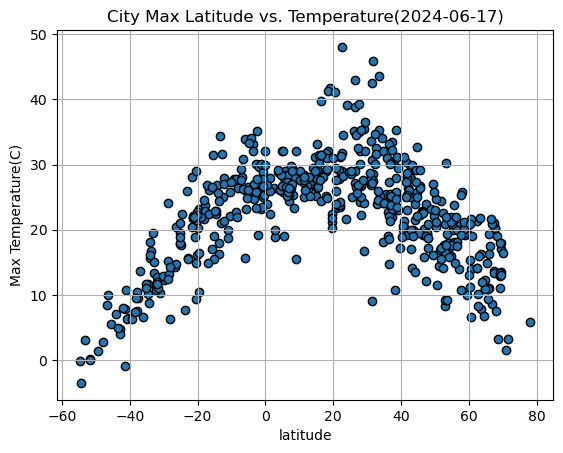

In [85]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

plt.scatter(latitude, max_temp, edgecolors="black")
plt.title("City Max Latitude vs. Temperature(2024-06-17)")
plt.xlabel("latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True)
# Save the figure
plt.savefig("/Users/mahermubarak/Desktop/Modules /python-api-challenge/WeatherPy/Starter_Code/output_data/Fig1.png")

## Latitude vs. Humidity Plot

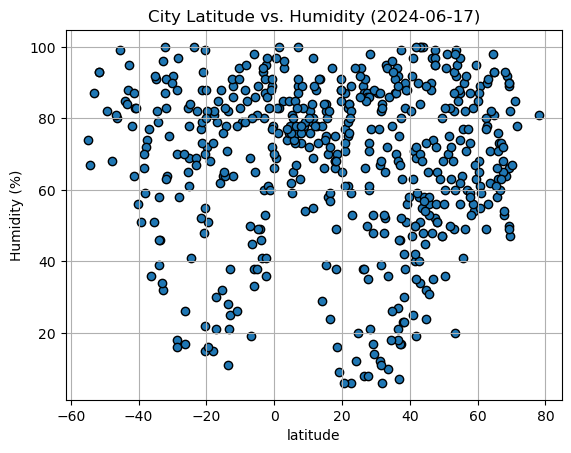

In [86]:
latitude
humidity = city_data_df["Humidity"]

plt.scatter(latitude, humidity, edgecolors="black")
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("/Users/mahermubarak/Desktop/Modules /python-api-challenge/WeatherPy/Starter_Code/output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

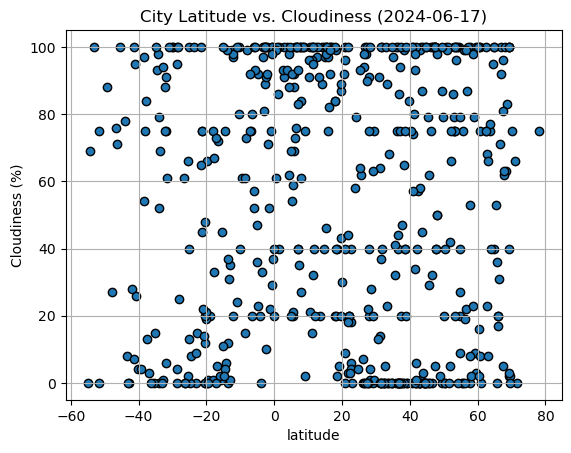

In [87]:
latitude
cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitude, cloudiness, edgecolors="black")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("/Users/mahermubarak/Desktop/Modules /python-api-challenge/WeatherPy/Starter_Code/output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

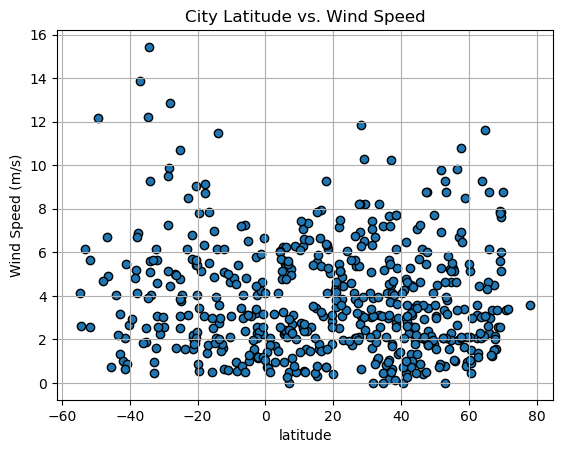

In [90]:
latitude
wind_speed = city_data_df["Wind Speed"]

plt.scatter(latitude, wind_speed, edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("/Users/mahermubarak/Desktop/Modules /python-api-challenge/WeatherPy/Starter_Code/output_data/Fig4.png")

In [135]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stde) = linregress(x, y)
    y_regress = x *slope + intercept
    plt.scatter(x, y)
    plt.plot(x, y_regress)
    plt.show()

In [136]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,29.89,58,0,0.89,US,1720368008
1,bethel,41.3712,-73.4140,30.36,71,80,0.45,US,1720368141
5,cumana,10.4635,-64.1775,27.62,76,21,2.74,VE,1720368299
8,morehead city,34.7229,-76.7260,32.01,78,0,7.20,US,1720368303
9,sabang,5.8933,95.3214,28.54,78,88,5.44,ID,1720368304


In [106]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto ayora,-0.7393,-90.3518,24.98,89,29,2.24,EC,1720368296
3,port-aux-francais,-49.3500,70.2167,1.33,82,88,12.15,TF,1720368297
4,margaret river,-33.9500,115.0667,15.69,58,52,5.08,AU,1720368298
6,pisco,-13.7000,-76.2167,18.03,82,0,3.60,PE,1720368300
7,waitangi,-43.9535,-176.5597,7.12,85,78,4.02,NZ,1720368301


## Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.39348520616656896


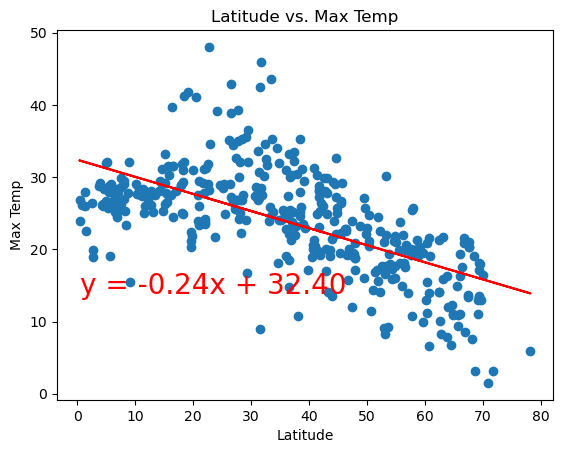

In [160]:
# Linear regression on Northern Hemisphere
north_temp = northern_hemi_df["Max Temp"]
north_lati = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lati, north_temp)
regress_values = north_lati * slope + intercept

plt.scatter(north_lati, north_temp)
plt.plot(north_lati, regress_values, "r-")
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(north_lati.min(), regress_values.min(), equation, fontsize=20, color='red')

print(f"The r^2-value is: {rvalue**2}")

## The graph above^ shows their is a negative correlation between latitude and max temp in the northeren hemisphere 

The r^2-value is: 0.7730106239625765


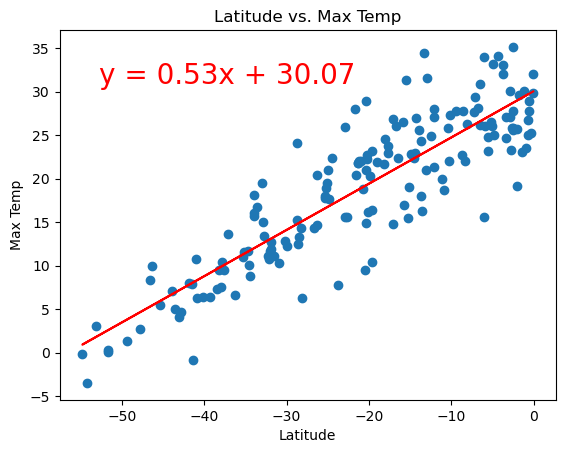

In [216]:
# Linear regression on Southern Hemisphere
south_temp = southern_hemi_df["Max Temp"]
south_lati = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lati, south_temp)
regress_values = south_lati * slope + intercept

plt.scatter(south_lati, south_temp)
plt.plot(south_lati, regress_values, "r-")
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(south_lati.min()+2, regress_values.min()+30, equation, fontsize=20, color='red')


print(f"The r^2-value is: {rvalue**2}")

## The graph above^ shows a strong positive correlation between latitude and max temp in the southern hemisphere 

In [1]:
# Northern Hemisphere
north_humididty =  northern_hemi_df["Humidity"]
north_lati = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lati, north_humididty)
regress_values = north_lati * slope + intercept

plt.scatter(north_lati, north_humididty)
plt.plot(north_lati, regress_values, "r-")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(north_lati.min()+50, regress_values.min()-40, equation, fontsize=10, color='red')


print(f"The r^2-value is: {rvalue**2}")

NameError: name 'northern_hemi_df' is not defined

## The graph^ shows there is no correlation between humidity and latitude in the northern hemisphere 

The r^2-value is: 0.008718046580214968


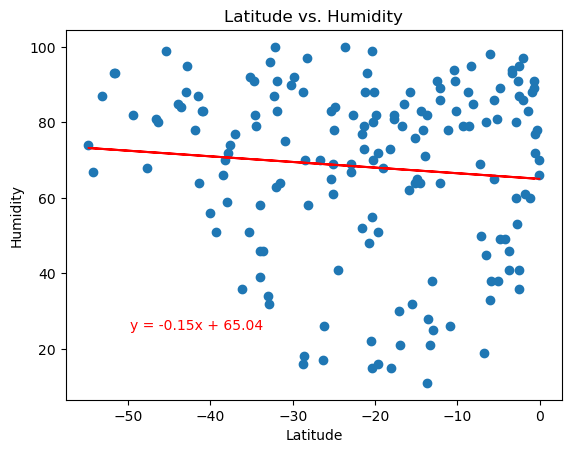

In [224]:
# Southern Hemisphere
south_lati = southern_hemi_df["Lat"]
south_humidity = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lati, south_humidity)
regress_values = south_lati * slope + intercept

plt.scatter(south_lati, south_humidity)
plt.plot(south_lati, regress_values, "r-")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(south_lati.min()+5, regress_values.min()-40, equation, fontsize=10, color='red')


print(f"The r^2-value is: {rvalue**2}")


## This graph^ also shows no clear correlation between humidity and latitude in the southern hemisphere

The r^2-value is: 0.022107052803204782


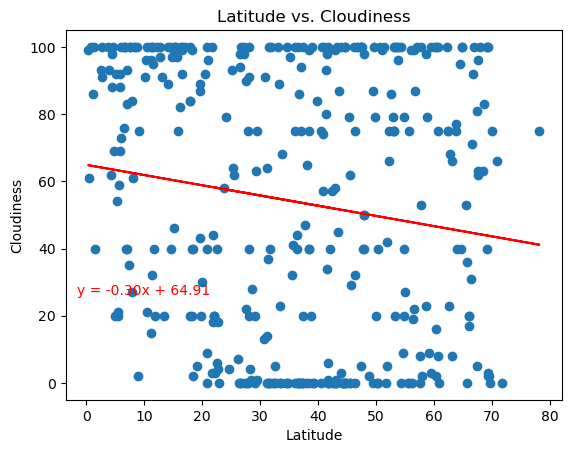

In [233]:
# Northern Hemisphere
north_lati = northern_hemi_df["Lat"]
north_cloudiness = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lati, north_cloudiness)
regress_values = north_lati * slope + intercept

plt.scatter(north_lati, north_cloudiness)
plt.plot(north_lati, regress_values, "r-")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(north_lati.min()-2, regress_values.min()-15, equation, fontsize=10, color='red')


print(f"The r^2-value is: {rvalue**2}")

## This graph^ indicated that in the northern hemisphere the cloudier it is the smaller the latitude

The r^2-value is: 0.017379406512398485


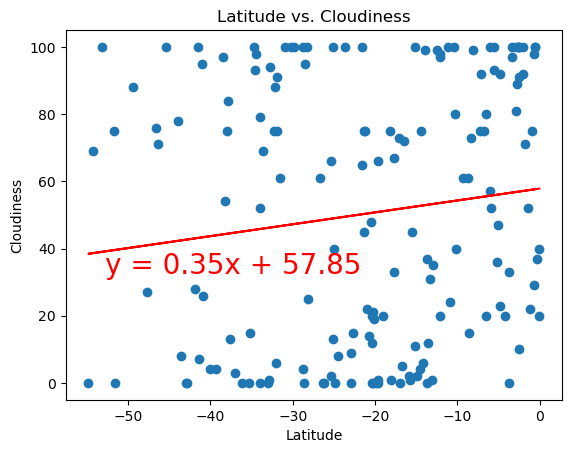

In [234]:
# Southern Hemisphere
south_lati = southern_hemi_df["Lat"]
south_cloudiness = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lati, south_cloudiness)
regress_values = south_lati * slope + intercept

plt.scatter(south_lati, south_cloudiness)
plt.plot(south_lati, regress_values, "r-")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(south_lati.min()+2, regress_values.min()-6, equation, fontsize=20, color='red')


print(f"The r^2-value is: {rvalue**2}")

## This graph^ indicated the opposite of the nothern hemisphere, showing the greater the lat the cloudier the hemisphere becomes.

The r^2-value is: 0.0020182606288954045


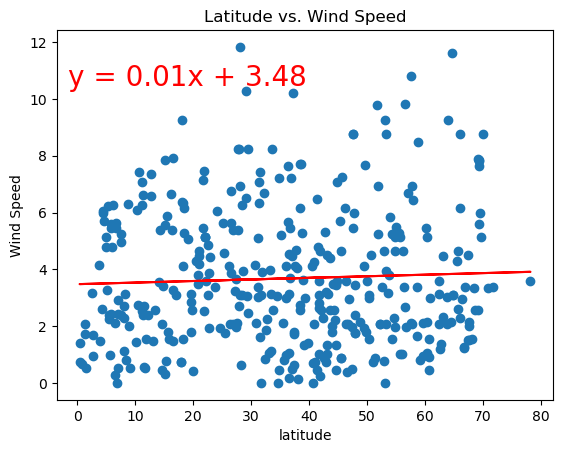

In [187]:
# Northern Hemisphere
north_lati = northern_hemi_df["Lat"]
north_wind_speed= northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lati, north_wind_speed)
regress_values = north_lati * slope + intercept

plt.scatter(north_lati, north_wind_speed)
plt.plot(north_lati, regress_values, "r-")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("latitude")
plt.ylabel("Wind Speed")

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(north_lati.min()-2, regress_values.min()+7, equation, fontsize=20, color='red')


print(f"The r^2-value is: {rvalue**2}")

## This graph^ shows no real correlation between lat and wind speed in the northern hemisphere 

The r^2-value is: 0.03980812748376722


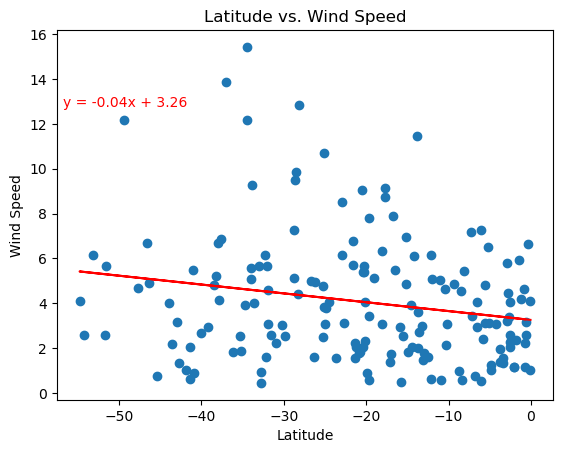

In [235]:
# Southern Hemisphere
south_lati = southern_hemi_df["Lat"]
south_wind_speed= southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lati, south_wind_speed)
regress_values = south_lati * slope + intercept

plt.scatter(south_lati, south_wind_speed)
plt.plot(south_lati, regress_values, "r-")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(south_lati.min()-2, regress_values.min()+10, equation, fontsize=10, color='red', ha='left', va='top')


print(f"The r^2-value is: {rvalue**2}")

## This graph^ indicated that the greater the latitude the less windy it becomes in the southern hemisphere 